## PCA of chemical composition of [Fetal Bovine Serum (FBS)](https://en.wikipedia.org/wiki/Fetal_bovine_serum)
### FBS is blood drawn from bovine fetus in a slaughterhouse (ethics???) and a by-product of the dairy industry. It is widely used in lab and industrial processes as a supplement to grow **eukaryotic cells**, due to the high level of growth factors and low level of antibodies.
### FBS is **not** a chemically defined medium, and as a result the composition between different slaughterhouses or even between batches within a slaughterhouse varies a lot (similar to Luria broth or yeast extract in yeast/bacterial fermentations).
### Because FBS is a complex array of protein components and the eukaryotic cells are highly sensitive to even small variations in their concentrations every batch of FBS is subject to stringent quality control testing and is supplied with a detailed Certificate of Analysis (CofA).
### In this tutorial, we will use the data from 25 CofA documents for different batches of FBS. FBS CofA contains the measurements of 19 variables and the problem has no output, so it is unsupervised learning.


In [1]:
import  pandas as pd 
import  numpy as np
import  matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Import data, check shape, table and basic stats

In [2]:
FBS = pd.read_csv('FBS_composition.csv')

In [3]:
FBS

,Lot_No,Mfg_Date,Year,Origin,Total_protein,Albumin,Globulin,Bilirubin,ALT,AST,...,Creatinine,Sodium,Potassium,Calcium,Phosphorus,Osmolality,Hemoglobin,pH,IgG,Endotoxin
0,20130527FS,05/2013,2013,Mexico,33,7.0,26.0,0.3,10,73,...,2.5,126,10.3,12.3,8.7,284,10.00,7.68,260.0,6.42
1,20131007FS,10/2013,2013,Mexico,37,8.0,2.9,0.5,11,87,...,2.6,134,10.6,13.1,9.6,295,18.50,7.50,267.0,3.00
2,20140225FS,02/2014,2014,Mexico,36,8.0,2.8,0.4,8,71,...,2.5,133,10.3,13.7,9.1,300,14.30,7.77,171.0,10.00
3,20160511FS,05/2016,2016,Nicaragua,38,2.2,1.6,0.4,8,65,...,3.2,137,10.6,13.9,9.1,302,13.60,7.60,69.9,0.50
4,20130723FS,07/2013,2013,USA,37,8.0,2.9,0.4,6,22,...,2.6,139,10.0,14.2,8.9,301,10.10,7.66,153.0,1.20
5,20131021FS,10/2013,2013,USA,36,8.0,2.8,0.3,6,25,...,2.6,127,9.7,12.5,8.9,280,10.40,7.78,147.0,6.00
6,20131124FS,11/2013,2013,USA,38,8.0,3.0,0.4,8,58,...,2.8,137,10.0,13.7,9.4,304,16.80,7.75,91.0,1.00
7,20140106FS,01/2014,2014,USA,36,8.0,2.8,0.5,8,84,...,2.8,126,9.5,13.6,8.9,301,14.20,7.62,178.0,0.90
8,20140319FS,03/2014,2014,USA,33,8.0,2.5,0.4,7,111,...,2.3,137,10.7,13.9,10.0,312,10.20,7.44,144.0,0.30
9,20140603FS,05/2013,2013,USA,34,9.0,2.5,0.3,6,70,...,2.2,135,9.5,13.2,9.6,307,8.30,7.30,83.1,1.00


In [4]:
FBS.describe()

,Year,Total_protein,Albumin,Globulin,Bilirubin,ALT,AST,Glucose,Urea,Creatinine,Sodium,Potassium,Calcium,Phosphorus,Osmolality,Hemoglobin,pH,IgG,Endotoxin
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,24.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,2014.920000,36.400000,4.672000,3.072000,0.400000,8.240000,67.120000,99.640000,14.708333,2.612000,134.480000,10.188000,13.460000,9.328000,300.640000,12.698800,7.481600,146.484000,1.684000
std,1.525341,1.755942,3.035419,4.819537,0.111803,2.487971,24.995533,21.490075,1.654484,0.280357,3.959377,0.496085,0.631796,0.600361,8.285932,4.241604,0.205866,104.234058,2.498344
min,2013.000000,33.000000,0.900000,1.300000,0.200000,5.000000,22.000000,53.000000,12.000000,2.100000,126.000000,9.500000,11.700000,7.800000,280.000000,4.600000,7.200000,68.400000,0.080000
25%,2014.000000,35.000000,2.100000,1.600000,0.300000,6.000000,52.000000,89.000000,14.000000,2.500000,133.000000,10.000000,13.200000,8.900000,300.000000,10.000000,7.300000,89.000000,0.300000
50%,2015.000000,37.000000,2.200000,1.800000,0.400000,8.000000,71.000000,99.000000,14.500000,2.600000,135.000000,10.000000,13.600000,9.300000,302.000000,12.400000,7.440000,102.000000,0.800000
75%,2016.000000,37.000000,8.000000,2.800000,0.400000,10.000000,87.000000,108.000000,15.000000,2.800000,137.000000,10.300000,13.900000,9.600000,306.000000,14.300000,7.660000,153.000000,1.000000
max,2017.000000,40.000000,9.000000,26.000000,0.600000,14.000000,111.000000,140.000000,21.000000,3.200000,142.000000,11.600000,14.300000,10.600000,312.000000,23.900000,7.800000,524.000000,10.000000


## Drop unnecessary columns and reset index

In [5]:
FBS_for_PCA = FBS.drop(['Mfg_Date', 'Origin', 'Year'], axis=1)

In [6]:
FBS_for_PCA.set_index('Lot_No', inplace=True)

In [7]:
FBS_for_PCA.fillna(FBS_for_PCA.mean(), inplace=True) # Here we have to fillna 

## Standardize data

In [8]:
FBS_scaled = StandardScaler().fit_transform(FBS_for_PCA)

## Perform PCA

In [9]:
pca = PCA(n_components=2, svd_solver='full')

In [10]:
PC = pca.fit_transform(FBS_scaled)

### Extract the scores (25 samples (rows), 2 scores (columns))

In [11]:
scores_pd = pd.DataFrame(data = PC
                         ,columns = ['PC1', 'PC2']
                         ,index = FBS_for_PCA.index)

In [12]:
scores_pd

,PC1,PC2
Lot_No,,
20130527FS,4.312939,-3.313669
20131007FS,1.675996,1.445652
20140225FS,1.419774,-0.740885
20160511FS,-1.616654,1.701456
20130723FS,-0.400979,-0.812261
20131021FS,2.916799,-3.009198
20131124FS,-0.044913,0.615308
20140106FS,1.570985,-0.111771
20140319FS,-0.946315,-0.715479


### Extract the loadings (new dimension directions, compared to the old 19) 

In [13]:
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2']
                           ,index = FBS_for_PCA.columns)

In [14]:
loadings_pd

,PC1,PC2
Total_protein,-0.040289,0.415457
Albumin,0.126443,-0.230927
Globulin,0.175637,-0.235423
Bilirubin,0.156934,0.436270
ALT,0.223644,0.370527
AST,0.130078,0.218658
Glucose,0.141951,-0.059132
Urea,-0.232962,0.093673
Creatinine,-0.198834,0.198329
Sodium,-0.293058,0.179750


## Plot the scores and loadings

In [27]:
def myplot(score,coeff,loading_labels=None,score_labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    xf = xs * scalex
    yf = ys * scaley
    #plt.scatter(xs * scalex,ys * scaley, s=10)
    for (x,y), label in zip(np.vstack((xf, yf)).T,score_labels):
        plt.text(x, y, label, ha='center', size=11)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*1.4, coeff[i,1]*1.4,color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.5, coeff[i,1] * 1.5, loading_labels[i], color = 'r', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()



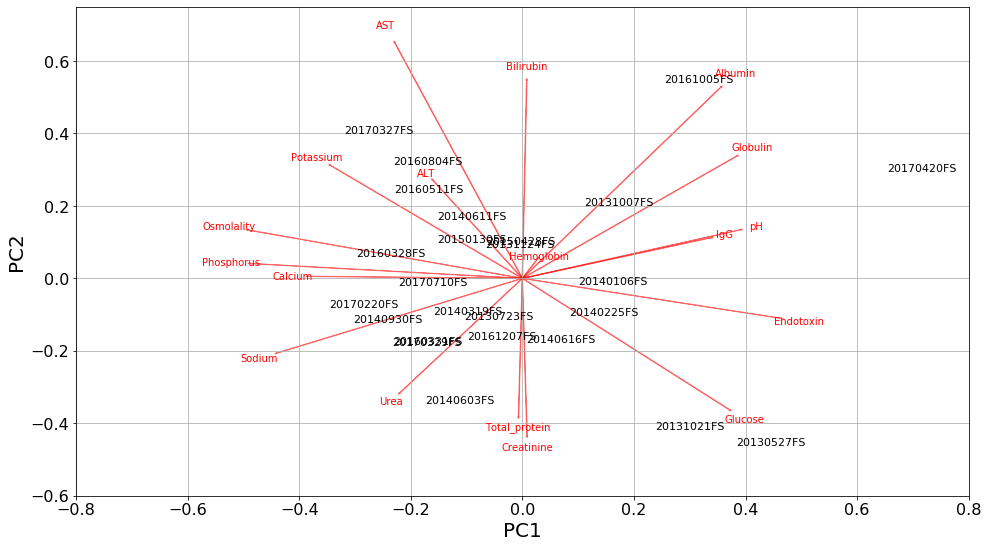

In [28]:
plt.rcParams["figure.figsize"] = [16,9]
myplot(PC,np.transpose(pca.components_[0:2, :]),loading_labels=loadings_pd.index,score_labels=scores_pd.index)
plt.xlim(-0.8,0.8)
plt.ylim(-0.6,0.75)
plt.show()

## **Uses:**
### Identify (if any) clusters, outliers or trends. Examples:
### 1. Batch 20170420FS is very different than all other batches (outlier?). It has high Albumin, Globulin, pH, IgG and Endotoxin levels.
### 2. Media optimization: let's say you want to test 3-4 different media for your cultures. You can request samples that span across all the areas in PC1-PC2 and test them, instead of trying "blindly" some that are closer than what you think.
### 3. Let's say your cultures are growing happily with Batch 20170327FS and you are exploring your options of buying a new batch. My first choice will be batch 20160804FS, since it's closer than any other batch.
### **NOTE:** If you have data regarding an output of interest (e.g. production of a certain protein) then you can formulate a supervised learning problem. In this setup, these 19 variables will be your inputs X and the output of interest (let's say the concentration of the protein you produce) will be your Y.


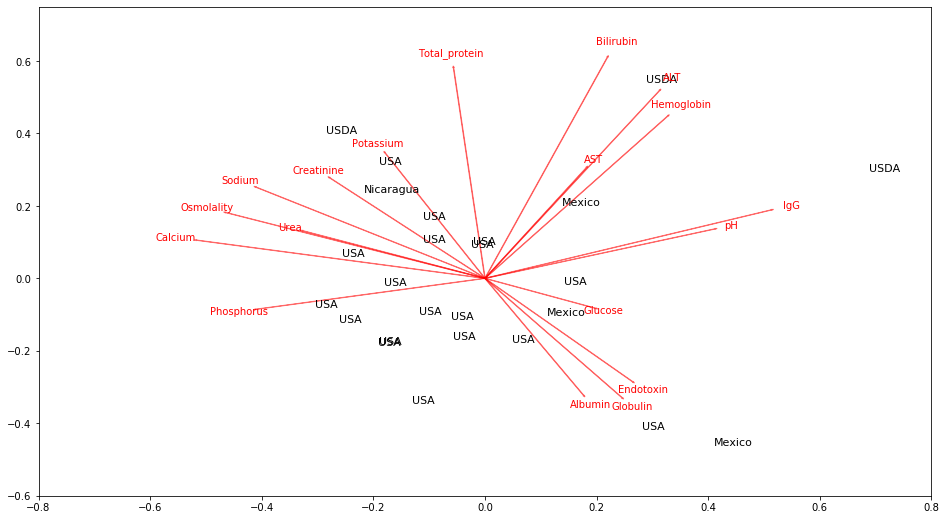

In [17]:
plt.rcParams["figure.figsize"] = [16,9]
myplot(PC,np.transpose(pca.components_[0:2, :]),loading_labels=loadings_pd.index,score_labels=FBS.Origin)
plt.xlim(-0.8,0.8)
plt.ylim(-0.6,0.75)
plt.show()

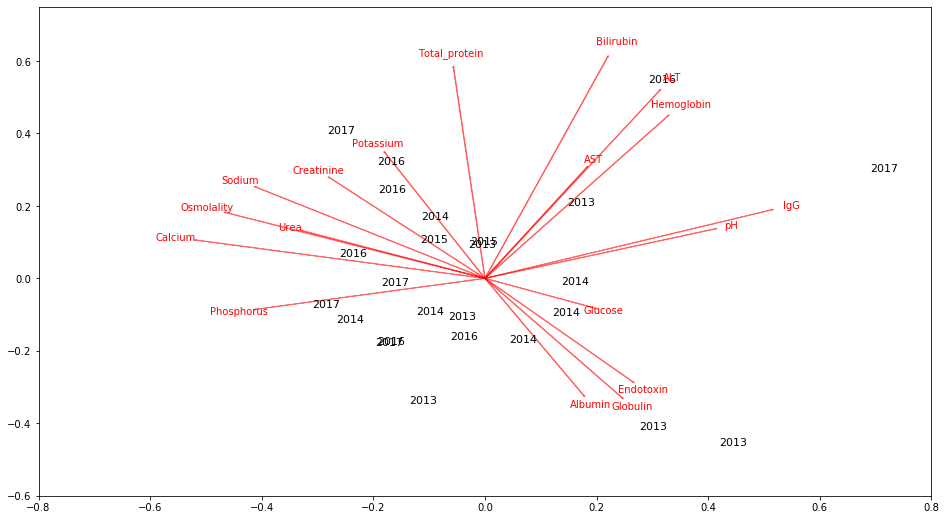

In [18]:
plt.rcParams["figure.figsize"] = [16,9]
myplot(PC,np.transpose(pca.components_[0:2, :]),loading_labels=loadings_pd.index,score_labels=FBS.Year)
plt.xlim(-0.8,0.8)
plt.ylim(-0.6,0.75)
plt.show()

## PCA of USA origin serum

In [19]:
FBS_from_USA = FBS.loc[FBS['Origin'] == 'USA']

In [20]:
FBS_USA_for_PCA = FBS_from_USA.drop(['Mfg_Date', 'Origin', 'Year'], axis=1)

In [21]:
FBS_USA_for_PCA.set_index('Lot_No', inplace=True)

In [22]:
FBS_USA_scaled = StandardScaler().fit_transform(FBS_USA_for_PCA)

In [23]:
PC_USA = pca.fit_transform(FBS_USA_scaled)

In [24]:
scores_USA_pd = pd.DataFrame(data = PC_USA
                         ,columns = ['PC1', 'PC2']
                         ,index = FBS_USA_for_PCA.index)

In [25]:
loadings_USA_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2']
                           ,index = FBS_USA_for_PCA.columns)

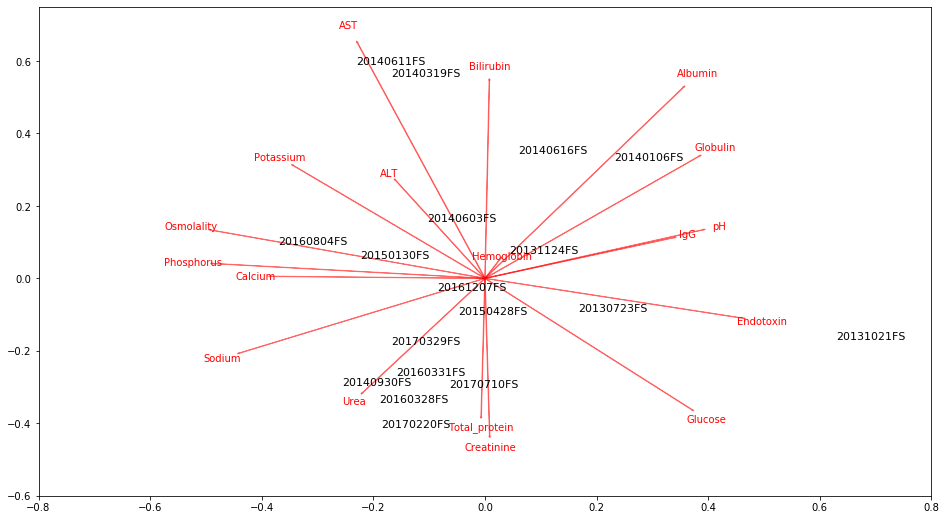

In [26]:
plt.rcParams["figure.figsize"] = [16,9]
myplot(PC_USA,np.transpose(pca.components_[0:2, :]),loading_labels=loadings_USA_pd.index,score_labels=scores_USA_pd.index)
plt.xlim(-0.8,0.8)
plt.ylim(-0.6,0.75)
plt.show()